In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Naresh IT\Datafiles\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**

- box plot is used for detect outliers

- box plot has min  q1   q2  q3  and max value

- Inside box plot red line represents median which 50 percentile data

**outlier**

- very very huge observation

- very very small observation

- which pull the data in any side of thee distribution

- Mild outliers

    - q1-1.5*IQR  and q3+1.5*IQR

- Strong outliers

    - q1-3*IQR    and  q3+3*IQR

- IQR : inter quartile range 

    - IQR=Q3-Q1

- q1: 25p

- q2: 50p

- q3: 75p

           Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR

                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

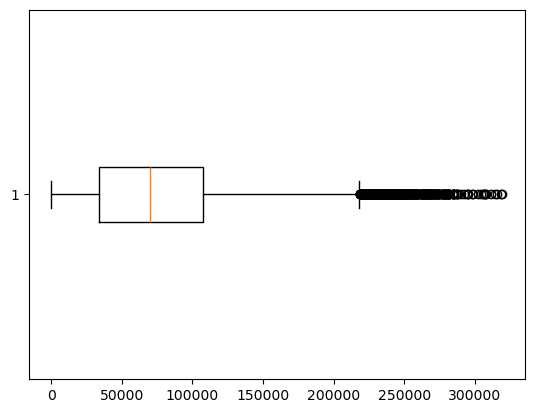

In [5]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

<Axes: >

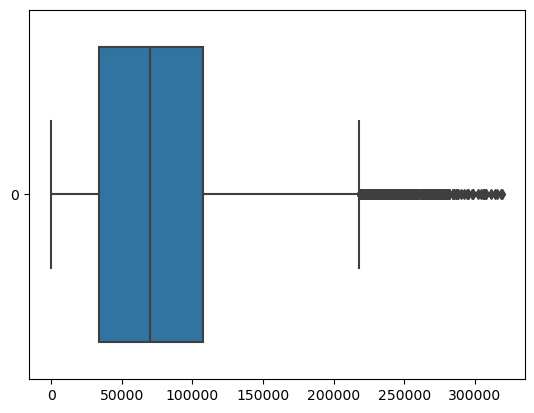

In [8]:
sns.boxplot(visa_df['prevailing_wage'],
           orient='h')

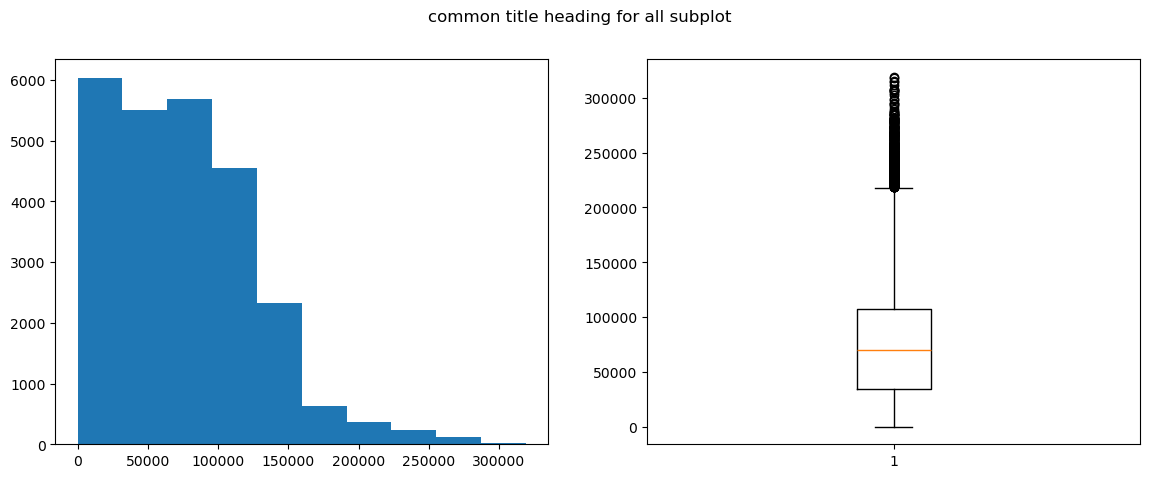

In [16]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

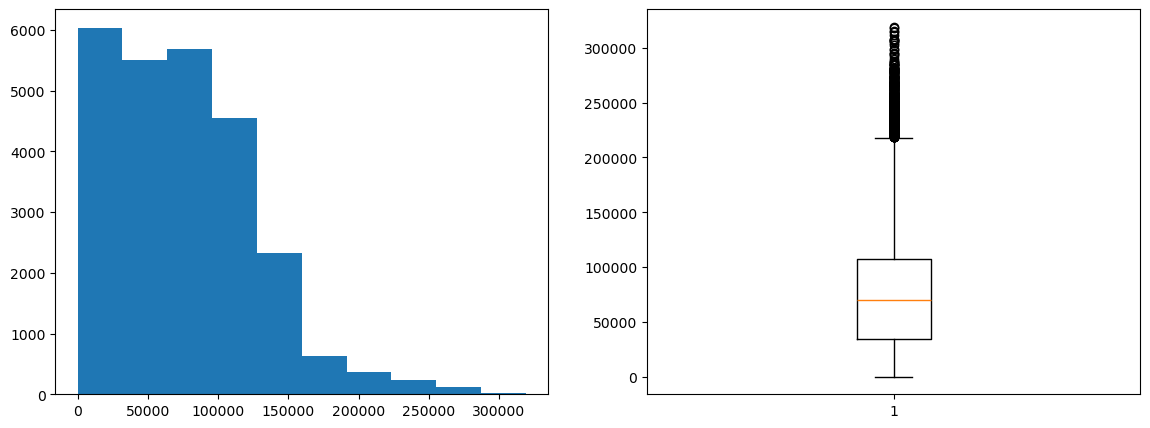

In [15]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- Outliers are avaialble less than q1-1.5*IQR

- Outliers are available greater than q3+1.5*IQR

- Step1:

    - calculate Q1: 25p

    - Calculate Q3: 75p

    - Caluculate IQR: Q3-Q1

- Step-2:

    - LB= Q1-1.5*IQR

    - UB= Q3+1.5*IQR

- Step-3:

    - con1= visa_df['prevailing_wage']<LB

    - con2= visa_df['prevailing_wage']>UB

    - apply Or operator and get the outliers data

**Outliers data**

In [25]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25), 2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

**Non outliers data**

In [27]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25), 2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

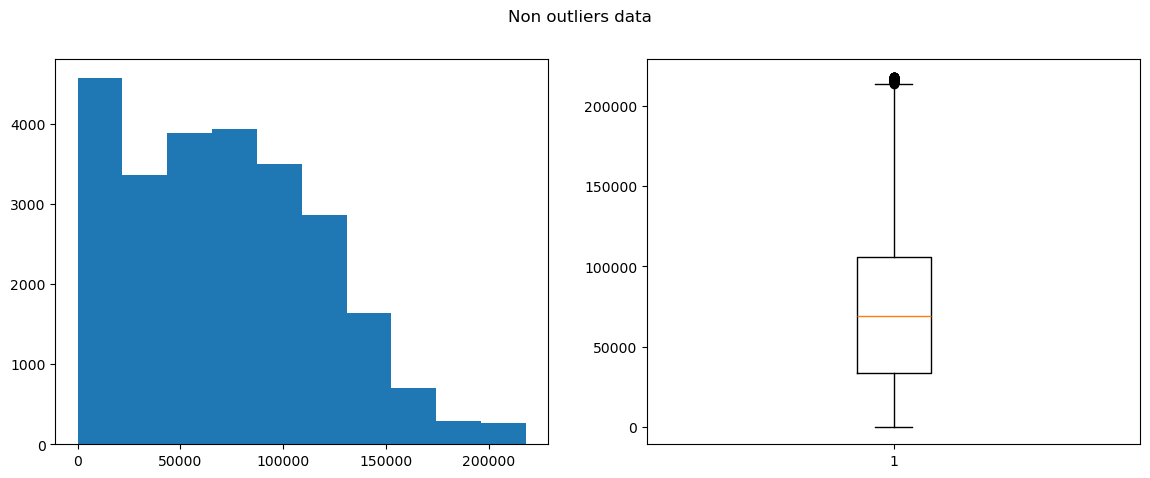

In [33]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053
plt.show()

**Comparing Total data with non outliers data**

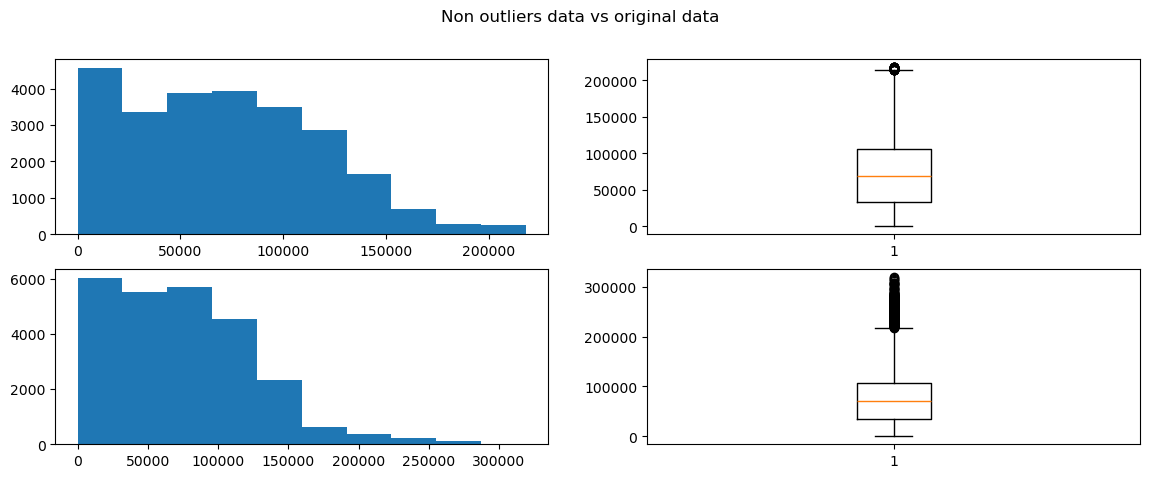

In [36]:
plt.figure(figsize=(14,5))  # 14 units in x axis  5 units in y axis

plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053


plt.subplot(2,2,3).hist(visa_df['prevailing_wage']) # 25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage']) # 25480
plt.show()

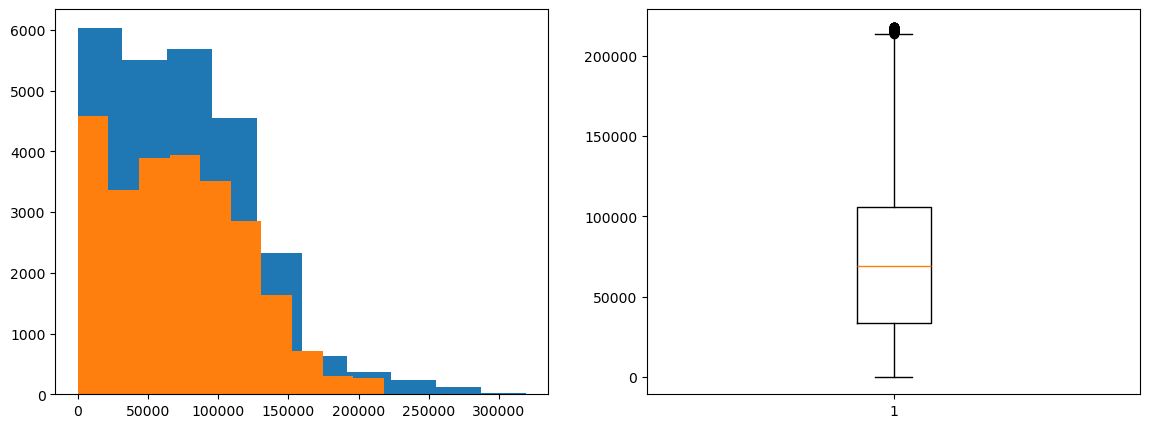

In [37]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053
plt.show()

**How to deal the outliers**

**Method-1: Drop the ouliers**

- Drop the ouliers is not a good idea

- When you drop the ouliers , data will loss

- For example here we are droping 427 rows

- x% of 25480=427

- it is 1.7% data, here it is fine we can drop the outlier

**Method-2: Fill with median value**

- we already know that outliers does not affect the median

- so we can fill outliers by median

**Method-3: Cap the values with Q1 and Q3**

- all Lesthan lower bound values, we can replace with q1 or LB

- all gretaer than upper bound values , we can replace with q3 or UB

**Fill with median**

- create a empty list

- calculate median value: visa_df['prevailing_wage'].median

- iterate through visa_df['prevailing_wage'].values

- if each value i.e. i, <lb or >ub then append with median values

- else append with i value

In [43]:
for i in visa_df['prevailing_wage'].values:
    if i<lb or i>ub:
        

592.2029
83425.65
122996.86
83434.03
149907.39
78252.14
53635.39
418.2298
74362.19
67514.76
83588.56
70813.09
28663.05
107196.03
220081.73
74108.02
3706.79
16132.61
150441.13
79948.12
71128.98
137694.98
45642.39
90108.38
71286.04
99489.65
86332.95
103029.33
40925.86
189190.48
79594.12
135866.13
72077.57
81921.18
225569.73
92421.92
2490.12
110817.26
50960.01
125336.9
39633.32
156326.33
43630.58
54614.42
28989.87
22924.91
61567.75
156251.17
86022.02
49565.37
66191.41
95623.2
115014.05
35018.04
230.8072
113799.64
85854.09
14174.04
47176.84
4949.28
67410.59
58791.58
103.2216
62591.57
102919.59
123468.56
82324.64
5319.49
153019.94
38059.89
230.327
61521.92
121316.5
122540.55
47170.76
330.3743
2927.34
107781.48
590.0203
194176.83
102073.81
113882.38
70778.82
84125.48
174014.59
34213.17
79813.05
113327.34
78893.64
140290.16
111926.01
125880.21
527.8901
49357.95
69335.2
99737.18
91449.62
34494.86
395.995
159645.51
28243.79
43421.88
80253.78
115235.95
95200.86
41613.52
64137.41
66295.43
97520.0

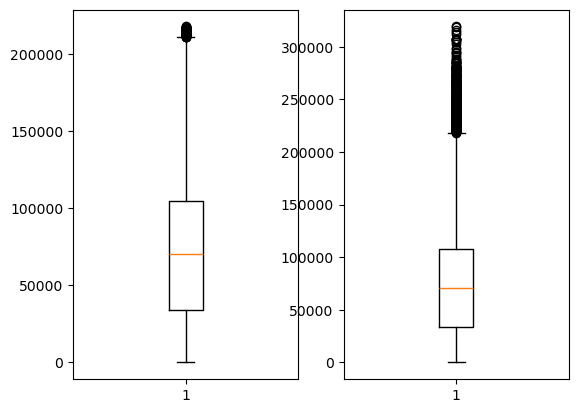

In [41]:
l1= []
median = visa_df['prevailing_wage'].median()

Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR


for value in visa_df['prevailing_wage'].values:
    if value  < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
        
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

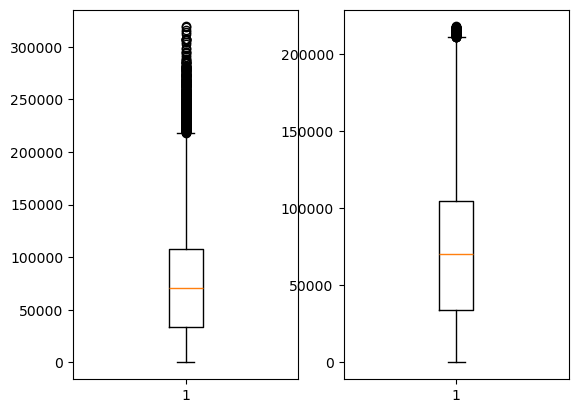

In [47]:
l=[]
median = visa_df['prevailing_wage'].median()
for i in (visa_df['prevailing_wage'].values):
    if i <LB or i>UB:
        l.append(median)
    else:
        l.append(i)
        
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

# Visa df: original data
# Visa df copy: medain values in place of outliers

**np.where**

- np.where will use for binary condition

- It has 3 arguments

    - condition

    - value if condition is True

    - value if condition False

In [50]:
d={"sub":["DS","ML","CS"],
   "Marks":[100,150,20]}
data=pd.DataFrame(d)

# Marks column replace with 1  when value >100
# else same value
# Marks  Marks
# 100     100
# 150      1
# 20      20

In [51]:
con= data['Marks']>100
l=np.where(con,1,data['Marks'])
# if condition True then replace with :1
# if ondition false then replace with : data['Marks']
l

array([100,   1,  20], dtype=int64)

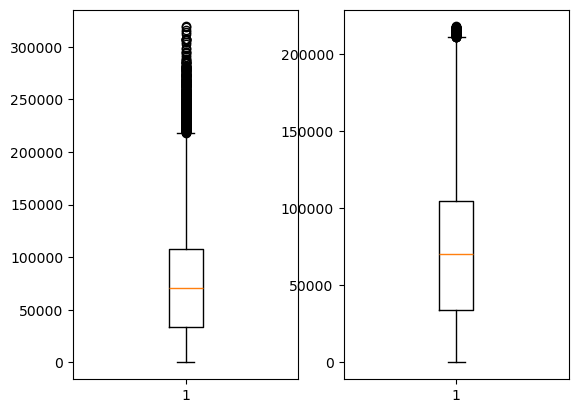

In [57]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1 | con2

median=visa_df['prevailing_wage'].median()

new_data=np.where(con,
                  median,
                  visa_df['prevailing_wage'])

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()